<a href="https://colab.research.google.com/github/Katzz16/COMP3610_Project/blob/branch3/Copy_of_nlp_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this code was to use my kaggle api key to download the dataset in here but i dont think it would work for you guys so ignore it and just download the dataset manually lol

place your kaggle.json file containing your api key into your content folder then run this cell

In [1]:
# copy kaggle.json to /root/.kaggle/ folder so that kaggle cli can access it.
# !mkdir /.kaggle
# !mv kaggle.json /.kaggle
# !mv /.kaggle /root/
# !chmod 600 ~/.kaggle/kaggle.json

if 'has_run' not in locals():
    # This code block will only run once per session
    print("This code block will only run once per session")
    !pip install kaggle
    !mkdir /.kaggle
    !mv kaggle.json /.kaggle
    !mv /.kaggle /root/
    !chmod 600 ~/.kaggle/kaggle.json
    has_run = True
else:
    # This code block will be skipped after the first run
    print("This code block has already been executed in this session")

This code block will only run once per session


if that runs then you can download the dataset directly as a zip and then unzip it

In [2]:
# Check if the cell has been executed before
if 'has_run2' not in locals():
    # This code block will only run once per session
    print("This code block will only run once per session")
    !kaggle datasets download -d mohamedbakhet/amazon-books-reviews
    has_run2 = True
else:
    # This code block will be skipped after the first run
    print("This code block has already been executed in this session")
    print("Already downloaded the dataset")

This code block will only run once per session
 98% 1.05G/1.06G [00:09<00:00, 138MB/s]
100% 1.06G/1.06G [00:09<00:00, 125MB/s]


In [3]:
# Check if the cell has been executed before
if 'has_run3' not in locals():
    # This code block will only run once per session
    print("This code block will only run once per session")
    !unzip amazon-books-reviews.zip
    has_run3 = True
else:
    # This code block will be skipped after the first run
    print("This code block has already been executed in this session")
    print("Already unzipped downloaded dataset")


This code block will only run once per session
Archive:  amazon-books-reviews.zip
  inflating: Books_rating.csv        
  inflating: books_data.csv          


In [6]:
import pandas as pd

# books_data = pd.read_csv('books_data.csv')
# books_ratings = pd.read_csv('Books_rating.csv')

# Check if the cell has been executed before
if 'has_run4' not in locals():
    # This code block will only run once per session
    print("This code block will only run once per session")
    books_data = pd.read_csv('books_data.csv')
    books_ratings = pd.read_csv('Books_rating.csv')
    has_run4 = True
else:
    # This code block will be skipped after the first run
    print("This code block has already been executed in this session")
    print("Already unzipped downloaded dataset")


This code block will only run once per session


In [7]:
# books_data = pd.read_csv('books_data.csv')
# books_ratings = pd.read_csv('Books_rating.csv')

In [8]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [9]:
books_data.shape

(212404, 10)

In [10]:
books_ratings.shape
books_ratings.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


***Data cleaning***

use only relevant columns from the df

In [11]:
bd = books_data[['Title', 'description', 'categories' ,'authors']]
bd.head()

,Title,description,categories,authors
0,Its Only Art If Its Well Hung!,NaN,['Comics & Graphic Novels'],['Julie Strain']
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Biography & Autobiography'],['Philip Nel']
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['Religion'],['David R. Ray']
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Fiction'],['Veronica Haddon']
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,NaN,['Edward Long']


take a sample of 20,000
this is because greater samples result in crashing

In [12]:
bd_cleaned = bd.sample(20_000, random_state=2)

check for and remove null data

In [13]:
bd_cleaned.isna().sum()

Title             0
description    6405
categories     3885
authors        2974
dtype: int64

In [14]:
bd_cleaned.dropna(inplace=True)

In [15]:
bd_cleaned.shape

(12863, 4)

In [16]:
bd_cleaned.head()

,Title,description,categories,authors
22827,The Truth about Cowboys (Home on the Ranch / H...,TRUTH OF THE HEART Erin MacKenzie considers he...,['Fiction'],['Margot Early']
168825,"What Time is It, Miffy?",Clock faces show the passage of time as Miffy ...,['Juvenile Fiction'],['Dick Bruna']
177944,How to Marry the Rich,The rich have to marry someone...why not you? ...,['Fiction'],"['Sayles Ginie Sayles', 'Ginie Sayles']"
186162,Scientists Must Write: A Guide to Better Writi...,Good writing and communication skills are esse...,['Language Arts & Disciplines'],['Robert Barrass']
191379,A Teacher's Guide to Creating Portfolios (Free...,Describes the process of how to create portfol...,['Education'],"['Martin Kimeldorf', 'Pamela Espeland']"


import necessary libraries

In [17]:
!pip install rake_nltk

In [18]:
from rake_nltk import Rake

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import string
# from string import punctuation
# from itertools import chain

from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_selection import SelectPercentile, chi2, f_regression, f_classif

# from sklearn import svm
from sklearn.utils import shuffle

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import gensim
from gensim.utils import simple_preprocess

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


this cleans the text passed in to make things easier

In [20]:
def clean_text2(text):
  return simple_preprocess(text)

In [21]:
from nltk.tokenize import word_tokenize
import string

# this was needed or else I got an error, I don't actually understand why
nltk.download('punkt')

def clean_text(text):
  text = str(text)
  # tokenize the text, i.e. break it up into a list of words/strings
  tokens = word_tokenize(text)

  # convert the tokens into lowercase
  tokens = [word.lower() for word in tokens]

  # remove punctuation
  # makes a translation table using string.punctuation which as a list of all punctuation
  table = str.maketrans('', '', string.punctuation)
  tokens = [word.translate(table) for word in tokens]

  # removes non alphaebtic tokens
  words = [word for word in tokens if word.isalpha()]

  # remove stopwords
  stop_words = set(stopwords.words('english'))
  words = [word for word in words if not word in stop_words]

  # join the words back together isntead of being a list
  # this is because trying to user countVectorizer gives an error on lists
  words = ' '.join(words)

  return (words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


create a copy of the cleaned df to work with

In [22]:
bd_copy = bd_cleaned.copy()
bd_copy.head()

,Title,description,categories,authors
22827,The Truth about Cowboys (Home on the Ranch / H...,TRUTH OF THE HEART Erin MacKenzie considers he...,['Fiction'],['Margot Early']
168825,"What Time is It, Miffy?",Clock faces show the passage of time as Miffy ...,['Juvenile Fiction'],['Dick Bruna']
177944,How to Marry the Rich,The rich have to marry someone...why not you? ...,['Fiction'],"['Sayles Ginie Sayles', 'Ginie Sayles']"
186162,Scientists Must Write: A Guide to Better Writi...,Good writing and communication skills are esse...,['Language Arts & Disciplines'],['Robert Barrass']
191379,A Teacher's Guide to Creating Portfolios (Free...,Describes the process of how to create portfol...,['Education'],"['Martin Kimeldorf', 'Pamela Espeland']"


further data cleaning

In [23]:
bd_copy['description']

22827     TRUTH OF THE HEART Erin MacKenzie considers he...
168825    Clock faces show the passage of time as Miffy ...
177944    The rich have to marry someone...why not you? ...
186162    Good writing and communication skills are esse...
191379    Describes the process of how to create portfol...
                                ...                        
161938    Readers are challenged to locate Vice Presiden...
132842    Down the River is a collection of essays both ...
107091    The first in-depth study of the savings and lo...
140825    This second edition is an invaluable textbook ...
142399    Coursing through the Atlantic Ocean is a power...
Name: description, Length: 12863, dtype: object

clean the descriptions

In [24]:
bd_copy['description'] = bd_copy['description'].apply(clean_text)

In [25]:
bd_copy['description'].head()

22827     truth heart erin mackenzie considers candidate...
168825    clock faces show passage time miffy rabbit goe...
177944    rich marry someone world one marry rich consul...
186162    good writing communication skills essential ma...
191379                  describes process create portfolios
Name: description, dtype: object

clean the titles

In [26]:
bd_copy['Title'] = bd_copy['Title'].apply(clean_text2)

In [27]:
bd_copy['Title'] = bd_copy['Title'].apply(' '.join)

In [28]:
bd_copy['Title'].head()

22827     the truth about cowboys home on the ranch harl...
168825                                what time is it miffy
177944                                how to marry the rich
186162    scientists must write guide to better writing ...
191379    teacher guide to creating portfolios free spir...
Name: Title, dtype: object

clean the authors

In [29]:
bd_copy['authors'] = bd_copy['authors'].apply(lambda x: simple_preprocess(x))

In [30]:
bd_copy['authors'] = bd_copy['authors'].apply(' '.join)

In [31]:
bd_copy['authors'].head()

22827                         margot early
168825                          dick bruna
177944    sayles ginie sayles ginie sayles
186162                      robert barrass
191379    martin kimeldorf pamela espeland
Name: authors, dtype: object

In [32]:
bd_copy.head()

,Title,description,categories,authors
22827,the truth about cowboys home on the ranch harl...,truth heart erin mackenzie considers candidate...,['Fiction'],margot early
168825,what time is it miffy,clock faces show passage time miffy rabbit goe...,['Juvenile Fiction'],dick bruna
177944,how to marry the rich,rich marry someone world one marry rich consul...,['Fiction'],sayles ginie sayles ginie sayles
186162,scientists must write guide to better writing ...,good writing communication skills essential ma...,['Language Arts & Disciplines'],robert barrass
191379,teacher guide to creating portfolios free spir...,describes process create portfolios,['Education'],martin kimeldorf pamela espeland


***keyword extraction!***

Rake (short for Rapid Automatic Keyword Extraction algorithm) extracts keywords for each description in the dataset

In [33]:
bd_copy['keywords'] = ' '

iterate through each description and pull out the keywords

In [34]:
for index, row in bd_copy.iterrows():
    description = row['description']

    #instantiating Rake
    r = Rake()

    #extract words by passing the text
    r.extract_keywords_from_text(description)

    #get the dictionary with key words and their scores
    keyword_dict_scores = r.get_word_degrees()

    #assign keywords to new columns
    bd_copy.at[index, 'keywords'] = list(keyword_dict_scores.keys())

In [35]:
bd_copy.head()

,Title,description,categories,authors,keywords
22827,the truth about cowboys home on the ranch harl...,truth heart erin mackenzie considers candidate...,['Fiction'],margot early,"[truth, heart, erin, mackenzie, considers, can..."
168825,what time is it miffy,clock faces show passage time miffy rabbit goe...,['Juvenile Fiction'],dick bruna,"[clock, faces, show, passage, time, miffy, rab..."
177944,how to marry the rich,rich marry someone world one marry rich consul...,['Fiction'],sayles ginie sayles ginie sayles,"[rich, marry, someone, world, one, consultant,..."
186162,scientists must write guide to better writing ...,good writing communication skills essential ma...,['Language Arts & Disciplines'],robert barrass,"[good, writing, communication, skills, essenti..."
191379,teacher guide to creating portfolios free spir...,describes process create portfolios,['Education'],martin kimeldorf pamela espeland,"[describes, process, create, portfolios]"


set the titles to be the new index for the dataset, this simplifies things later on

In [36]:
bd_copy.set_index('Title', inplace = True)
bd_copy.head()

,description,categories,authors,keywords
Title,,,,
the truth about cowboys home on the ranch harlequin superromance no,truth heart erin mackenzie considers candidate...,['Fiction'],margot early,"[truth, heart, erin, mackenzie, considers, can..."
what time is it miffy,clock faces show passage time miffy rabbit goe...,['Juvenile Fiction'],dick bruna,"[clock, faces, show, passage, time, miffy, rab..."
how to marry the rich,rich marry someone world one marry rich consul...,['Fiction'],sayles ginie sayles ginie sayles,"[rich, marry, someone, world, one, consultant,..."
scientists must write guide to better writing for scientists engineers and students second edition routledge study guides,good writing communication skills essential ma...,['Language Arts & Disciplines'],robert barrass,"[good, writing, communication, skills, essenti..."
teacher guide to creating portfolios free spirited classroom,describes process create portfolios,['Education'],martin kimeldorf pamela espeland,"[describes, process, create, portfolios]"


***bag of word creation!***

This is the actual feature that we will be using to make our comparisons on and utilizes each column in the dataframe

In [37]:
bd_copy['bow'] = ' '
columns = bd_copy.columns

for index, row in bd_copy.iterrows():
    words = ''
    for col in columns:

      # if col != 'authors':
      #       # Check if the data in the column is a list
      #       if isinstance(row[col], list):
      #           words = words + ' '.join(row[col])+ ' '
      #       else:
      #           words = words + row[col] + ' '

      if isinstance(row[col], list):
          words = words + ' '.join(row[col])+ ' '
      else:
          words = words + row[col] + ' '


      bd_copy.at[index, 'bow'] = words

In [38]:
bd_copy['bow'][0]

"truth heart erin mackenzie considers candidate dumped cowboys hall fame especially since stood rodeo cowboy abe cockburn father baby daughter maeve another father rancher kip kay never even met never acknowledged erin makes risky choice goes colorado tell abe daughter tell kip goes colorado find truth fathers ['Fiction'] margot early truth heart erin mackenzie considers candidate dumped cowboys hall fame especially since stood rodeo cowboy abe cockburn father baby daughter maeve another rancher kip kay never even met acknowledged makes risky choice goes colorado tell find fathers   "

In [ ]:
# Assuming 'df' is your DataFrame and 'bow_column' is the name of your BoW column
# Convert the BoW column to a list of words
bow_words = bd_copy['bow'].str.split().sum()

# Create a pandas Series to count the frequency of each word
word_counts = pd.Series(bow_words).value_counts()



KeyboardInterrupt: 

In [ ]:
# Plot a histogram of word frequencies
plt.figure(figsize=(10, 6))
word_counts.plot(kind='bar')
plt.title('Histogram of Word Frequencies')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Select the top N most frequent words for plotting
top_words = word_counts.head(100)  # Adjust '100' as needed

# Create a scatter plot of word frequencies
plt.figure(figsize=(10, 6))
plt.scatter(range(len(top_words)), top_words.values, marker='.')
plt.title('Scatter Plot of Word Frequencies')
plt.xlabel('Word Index (Sorted by Frequency)')
plt.ylabel('Frequency')
plt.xticks(range(len(top_words)), top_words.index, rotation=90)  # Use words as x-axis labels
plt.tight_layout()
plt.show()

function for creating word clouds

In [39]:
from wordcloud import WordCloud, STOPWORDS

In [40]:
def print_cloud(data):
    text = " ".join(word for word in data)
    print ("There are {} words in the combination".format(len(text)))
    stopwords_set = set(stopwords.words('english'))
    wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
    return wordcloud

There are 11845195 words in the combination


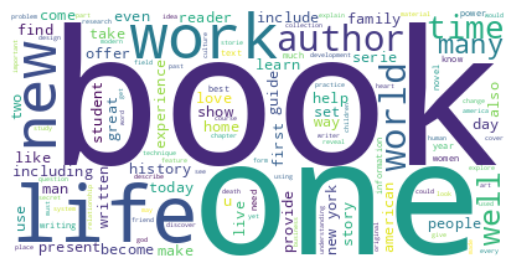

In [41]:
wordcloud = print_cloud(bd_copy['bow'])
fig = plt.figure(2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word1.png", dpi=300)

creating the ***tfidf matrix*** using the bow!

In [42]:
#creating tfidf matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['review/text'])
tfidf_matrix = tfidf_vectorizer.fit_transform(bd_copy['bow'])

In [43]:
tfidf_matrix

<12863x68472 sparse matrix of type '<class 'numpy.float64'>'
	with 658644 stored elements in Compressed Sparse Row format>

In [44]:
type(tfidf_matrix)

scipy.sparse._csr.csr_matrix

we can view the vocab of our tfidf vectorizer

In [45]:
print(tfidf_vectorizer.vocabulary_)

{'truth': 62685, 'heart': 26888, 'erin': 19597, 'mackenzie': 36201, 'considers': 12296, 'candidate': 8712, 'dumped': 17659, 'cowboys': 13225, 'hall': 26148, 'fame': 20887, 'especially': 19748, 'stood': 58219, 'rodeo': 51854, 'cowboy': 13224, 'abe': 105, 'cockburn': 11092, 'father': 21125, 'baby': 4277, 'daughter': 14519, 'maeve': 36321, 'rancher': 49292, 'kip': 32853, 'kay': 32396, 'met': 38376, 'acknowledged': 447, 'makes': 36507, 'risky': 51639, 'choice': 10265, 'goes': 24819, 'colorado': 11379, 'tell': 60372, 'fathers': 21134, 'fiction': 21529, 'margot': 36959, 'early': 17908, 'clock': 10910, 'faces': 20713, 'passage': 44655, 'time': 61351, 'miffy': 38702, 'rabbit': 49004, 'day': 14561, 'waking': 65680, 'school': 53461, 'meals': 37829, 'play': 46255, 'bedtime': 5155, 'board': 6561, 'pages': 44142, 'juvenile': 32107, 'dick': 15935, 'bruna': 7790, 'rich': 51414, 'marry': 37128, 'world': 67354, 'consultant': 12388, 'reveals': 51196, 'secrets': 53937, 'detailed': 15658, 'stepbystep': 57

In [46]:
# from wordcloud import WordCloud, STOPWORDS

# tfidf_cloud = tfidf_vectorizer.vocabulary_

# wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tfidf_cloud)

# # Display the generated image
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

word cloud for tfidf vectorizer

In [47]:
# def print_cloud(data):
#     text = " ".join(bow for bow in data)
#     print ("There are {} words in the combination of all bows.".format(len(text)))
#     stopwords_set = set(stopwords.words('english'))
#     wordcloud = WordCloud(stopwords=stopwords_set, background_color="white").generate(text)
#     return wordcloud

There are 622948 words in the combination


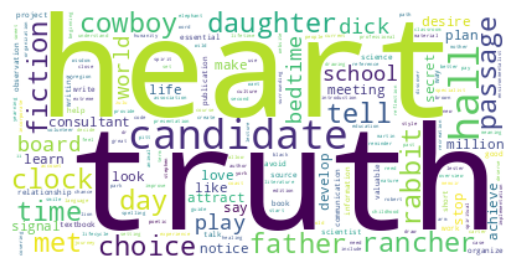

In [48]:
wordcloud = print_cloud(tfidf_vectorizer.vocabulary_)
fig = plt.figure(2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word_tfidf.png", dpi=300)

In [49]:
c = tfidf_matrix.todense()
c

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

creating the ***count vectorizer matrix*** using the bow

In [50]:
#instantiating and generating the count matrix
count = CountVectorizer()
count_matrix = count.fit_transform(bd_copy['bow'])

#create a Series for movie titles so they are associated to an ordered numerical list, we will use this later to match index
indices = pd.Series(bd_copy.index)
indices[:5]

0    the truth about cowboys home on the ranch harl...
1                                what time is it miffy
2                                how to marry the rich
3    scientists must write guide to better writing ...
4    teacher guide to creating portfolios free spir...
Name: Title, dtype: object

In [51]:
count_matrix

<12863x68690 sparse matrix of type '<class 'numpy.int64'>'
	with 704325 stored elements in Compressed Sparse Row format>

In [52]:
type(count_matrix)

scipy.sparse._csr.csr_matrix

In [53]:
print(count.vocabulary_)

{'truth': 62875, 'heart': 26972, 'erin': 19653, 'mackenzie': 36303, 'considers': 12337, 'candidate': 8750, 'dumped': 17707, 'cowboys': 13267, 'hall': 26231, 'fame': 20951, 'especially': 19804, 'since': 55767, 'stood': 58385, 'rodeo': 51999, 'cowboy': 13266, 'abe': 105, 'cockburn': 11132, 'father': 21189, 'baby': 4300, 'daughter': 14562, 'maeve': 36424, 'another': 2461, 'rancher': 49435, 'kip': 32950, 'kay': 32492, 'never': 41417, 'even': 20099, 'met': 38482, 'acknowledged': 447, 'makes': 36610, 'risky': 51784, 'choice': 10304, 'goes': 24902, 'colorado': 11419, 'tell': 60540, 'find': 21791, 'fathers': 21198, 'fiction': 21593, 'margot': 37063, 'early': 17956, 'clock': 10949, 'faces': 20777, 'show': 55381, 'passage': 44794, 'time': 61535, 'miffy': 38808, 'rabbit': 49147, 'day': 14604, 'waking': 65877, 'school': 53606, 'meals': 37934, 'play': 46396, 'bedtime': 5183, 'board': 6596, 'pages': 44280, 'juvenile': 32203, 'dick': 15981, 'bruna': 7826, 'rich': 51559, 'marry': 37232, 'someone': 568

word cloud for count vectorizer

There are 624306 words in the combination


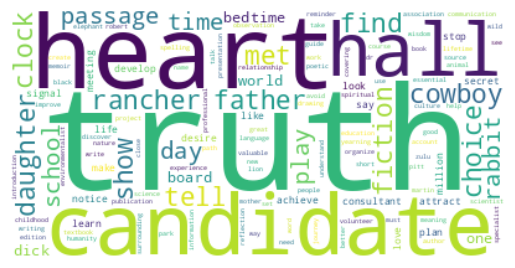

In [54]:
wordcloud = print_cloud(count.vocabulary_)
fig = plt.figure(2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
fig.savefig("word_count.png", dpi=300)

***cosine similarity for count vectorizer***

In [55]:
count_cos_sim = cosine_similarity(count_matrix, count_matrix)
count_cos_sim

array([[1.        , 0.059875  , 0.00472334, ..., 0.        , 0.        ,
        0.        ],
       [0.059875  , 1.        , 0.00812069, ..., 0.        , 0.        ,
        0.02919786],
       [0.00472334, 0.00812069, 1.        , ..., 0.02733833, 0.03579427,
        0.05643143],
       ...,
       [0.        , 0.        , 0.02733833, ..., 1.        , 0.        ,
        0.03686049],
       [0.        , 0.        , 0.03579427, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02919786, 0.05643143, ..., 0.03686049, 0.        ,
        1.        ]])

***cosine similarity for tfidf vectorizer***

In [56]:
tfidf_cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
tfidf_cos_sim

array([[1.00000000e+00, 3.76843661e-02, 8.08868768e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.76843661e-02, 1.00000000e+00, 1.43839278e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.25238098e-03],
       [8.08868768e-04, 1.43839278e-03, 1.00000000e+00, ...,
        1.68371827e-02, 1.60691140e-02, 1.78189926e-02],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.68371827e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.58467045e-02],
       [0.00000000e+00, 0.00000000e+00, 1.60691140e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 7.25238098e-03, 1.78189926e-02, ...,
        1.58467045e-02, 0.00000000e+00, 1.00000000e+00]])

we'll call this function to make the recommendations

it takes in the title of the movie, n number of top recommendations and the cosine similarity

In [57]:
def recommendations(title,n,cosine_sim):
    recommended_books = []

    #get index of the movie that matches the title
    # this is why we turned the title into indexes earlier :)
    idx = indices[indices == title].index[0]

    #find highest cosine_sim this title shares with other titles extracted earlier and save it in a Series
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)

    #get indexes of the top n books
    top_n_indexes = list(score_series.iloc[1:n+1].index)
    print(top_n_indexes)

    #populating the list with titles of n matching movie
    for i in top_n_indexes:
        recommended_books.append(list(bd_copy.index)[i])
    # return the recommended books list and the top n indexes for the book
    return recommended_books, top_n_indexes

this is just to see some titles to pick out for use

In [58]:
bd_copy.head(20)

,description,categories,authors,keywords,bow
Title,,,,,
the truth about cowboys home on the ranch harlequin superromance no,truth heart erin mackenzie considers candidate...,['Fiction'],margot early,"[truth, heart, erin, mackenzie, considers, can...",truth heart erin mackenzie considers candidate...
what time is it miffy,clock faces show passage time miffy rabbit goe...,['Juvenile Fiction'],dick bruna,"[clock, faces, show, passage, time, miffy, rab...",clock faces show passage time miffy rabbit goe...
how to marry the rich,rich marry someone world one marry rich consul...,['Fiction'],sayles ginie sayles ginie sayles,"[rich, marry, someone, world, one, consultant,...",rich marry someone world one marry rich consul...
scientists must write guide to better writing for scientists engineers and students second edition routledge study guides,good writing communication skills essential ma...,['Language Arts & Disciplines'],robert barrass,"[good, writing, communication, skills, essenti...",good writing communication skills essential ma...
teacher guide to creating portfolios free spirited classroom,describes process create portfolios,['Education'],martin kimeldorf pamela espeland,"[describes, process, create, portfolios]",describes process create portfolios ['Educatio...
lion and the black,name sicelo cabangani mbatha wilderness name b...,['Biography & Autobiography'],sicelo mbatha bridget pitt,"[name, sicelo, cabangani, mbatha, wilderness, ...",name sicelo cabangani mbatha wilderness name b...
object oriented and classical software engineering,classical objectoriented software engineering ...,['C+'],stephen schach,"[classical, objectoriented, software, engineer...",classical objectoriented software engineering ...
atlantic surf fishing,describes rods lures baits fishing techniques ...,['Sports & Recreation'],lester boyd raymond knowles,"[describes, rods, lures, baits, fishing, techn...",describes rods lures baits fishing techniques ...
creating wire and beaded jewelry,teaches wirework beading techniques features p...,['Crafts & Hobbies'],janice berkebile tracy stanley,"[teaches, wirework, beading, techniques, featu...",teaches wirework beading techniques features p...


recommendations using count vectorizer cosine similarity matrix first

In [78]:
movie = 'the story of judaism'
n = 10

In [79]:
# recommendations(movie, n, count_cos_sim)

recommendations_count, top_n_count = recommendations(movie, n, count_cos_sim)
recommendations_count

[4606, 6115, 8347, 9526, 3564, 7668, 8118, 7456, 9005, 3850]


['religion and revelation theology of revelation in the world religions',
 'handbook of living religions',
 'selected religious poems of solomon ibn gabirol the jewish classics english and hebrew edition',
 'the isma ilis their history and doctrines',
 'judaism for dummies for dummies computer tech',
 'the wise man from the west',
 'fetish masterpieces of erotic fantasy photography',
 'the faith club muslim christian jew three women search for understanding',
 'genesis memory of fire trilogy',
 'the art of war war and military thought']

to manually check the descriptions:

In [80]:
index_to_check = indices[indices == movie].index[0]
index_to_check

10

get the description of the movie your looking for to read it yourself

In [81]:
bd_copy.iloc[index_to_check]['description']

'judaism one oldest religions world preserved distinctive identity despite extraordinarily diverse forms beliefs embodied course three millennia history judaism provides first truly comprehensive look one volume great religion came evolved one age next various strains sects traditions related magisterial elegantly written book martin goodman takes readers judaism origins polytheistic world second first millennia bce temple cult time jesus tells stories rabbis mystics messiahs medieval early modern periods guides us many varieties judaism today goodman compelling narrative spans globe middle east europe america north africa china india explains institutions ideas forms judaism based masterfully weaves together different threads doctrinal philosophical debate run throughout history'

to check the descriptions for the similar books, put in the index number of the book

In [82]:
bd_copy.iloc[4606]['description']

'since first thomas aquinas defined theology revelation rational elucidation revealed truth idea revelation played fundamental role history western theology book provides new detailed investigation concept examining nature sources limitations five major scriptural religions world christianity judaism islam hinduism buddhism first part book discusses nature theology expounds comparative method useful appropriate modern age part two focuses nature religion early historical manifestations whilst third part book goes consider idea revelation found great canonical traditions religions world part four develops distinctively christian idea revelation divine selfexpression history final part book discusses far idea revelation must revised adapted light modern historical scientific thought proposes new positive theology revelation future book includes discussions work major theologians scholars study religion aquinas tillich barth temple frazer evans pritchard interest many scholars students co

now recommmendations for the tfidf

In [83]:
# recommendations(movie, n, tfidf_cos_sim)

recommendations_tfidf, top_n_tfidf = recommendations(movie, n, tfidf_cos_sim)
recommendations_tfidf

[8347, 3564, 3465, 11496, 6434, 3527, 6115, 11978, 3499, 10545]


['selected religious poems of solomon ibn gabirol the jewish classics english and hebrew edition',
 'judaism for dummies for dummies computer tech',
 'the complete idiot guide to understanding judaism',
 'choosing survival strategies for jewish future',
 'roots of rabbinic judaism an intellectural history from ezekiel to daniel',
 'where judaism differed',
 'handbook of living religions',
 'becoming jew',
 'secret anniversaries of the heart new and selected stories by lev raphael',
 'judaism christianity and islam']

In [65]:
# indices[indices == movie].index[0]

get the cosine similarity for every movie

In [66]:
# pd.Series(count_cos_sim[indices[indices == movie].index[0]])

attempting clustering of tfidf matrix

In [71]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

truncaded svd is similar to PCA but works on sparse row matrices

on tfidf matrix

In [72]:
# pca = PCA(n_components=2)
# tfidf_matrix_pca = pca.fit_transform(tfidf_matrix)
svd = TruncatedSVD(n_components=2, random_state=42)
tfidf_matrix_svd = svd.fit_transform(tfidf_matrix)

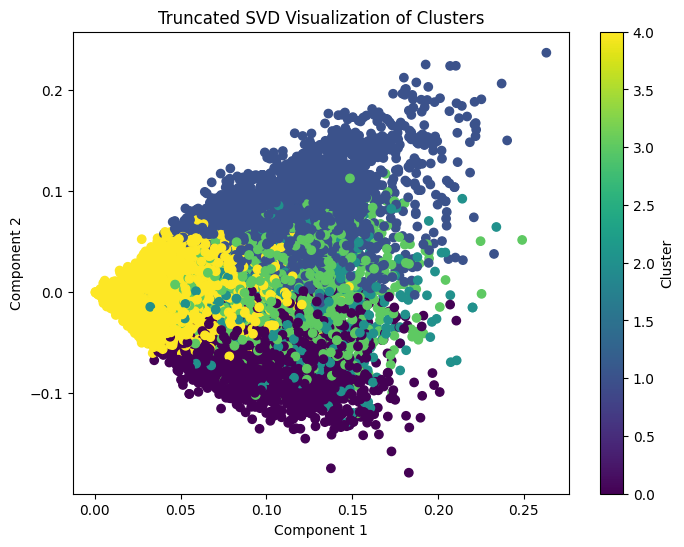

In [73]:
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_matrix_svd[:, 0], tfidf_matrix_svd[:, 1], c=clusters, cmap='viridis')
plt.title('Truncated SVD Visualization of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

***interpretations for tfidf truncated svd visualization:***

*Distinct Clusters in Corners*: The triangle like shape being mostly populated by one type of cluster can mean that they are decently separated from eachother in reduced-dimensional space which means that there are indeed clear distinctions between the clusters

*Overlap in the Middle:* The overlapping region in the middle suggests that there are similarities or shared characteristics between the clusters in this area. It's likely that books belonging to these clusters have common themes or features that are not as distinct as those in the corner clusters.

*Cluster Density:* Higher density indicates a larger number of books belonging to that cluster, while lower density suggests fewer books. They are all tightly packed except for some sparse outliers

*Outliers:* There are indeed some outliers which suggests that these books have unique or special features that make them distinct from everything else

on count vectorizer matrix

In [76]:
svd2 = TruncatedSVD(n_components=2, random_state=42)
count_matrix_svd = svd2.fit_transform(count_matrix)

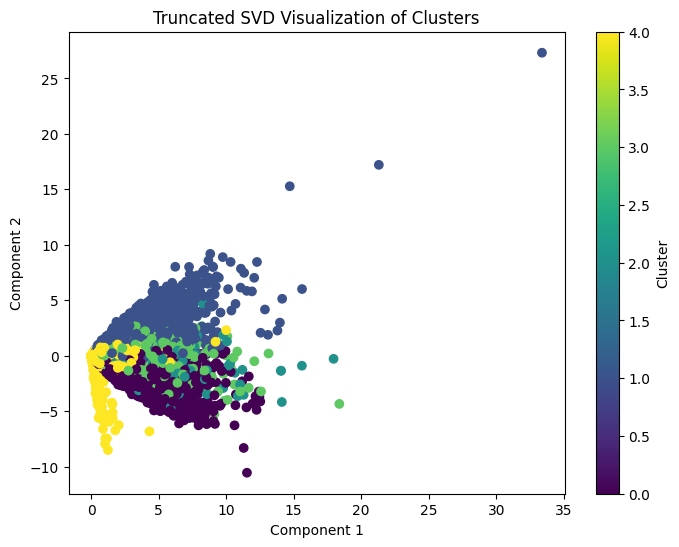

In [77]:
# Plot clusters
plt.figure(figsize=(8, 6))
plt.scatter(count_matrix_svd[:, 0], count_matrix_svd[:, 1], c=clusters, cmap='viridis')
plt.title('Truncated SVD Visualization of Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()

***interpretations for count vectorizer truncated svd visualization:***

***Wowzers!*** the count vectorizer visualization has a much worse case of outliers and sparse regions! This was actually able to be seen to an extent for example with the judiasm book.


In [85]:
from scipy.spatial.distance import euclidean

# Calculate the centroid of the data
centroid = count_matrix_svd.mean(axis=0)

# Calculate distances of each data point to the centroid
distances_to_centroid = [euclidean(point, centroid) for point in count_matrix_svd]

# Set a threshold for outlier detection (e.g., 2 standard deviations from the mean)
threshold = 2 * np.std(distances_to_centroid)

# Identify outliers based on the threshold
outlier_indices = np.where(distances_to_centroid > threshold)[0]

# Print the indices of outliers
print("Indices of outliers:", outlier_indices)

Indices of outliers: [    3     6     9 ... 12830 12850 12852]


In [95]:
# Sort the distances in descending order and get the index of the largest outlier
max_outlier_index = np.argmax(distances_to_centroid)

# # Retrieve the index of the largest outlier
# largest_outlier_index = outlier_indices[max_outlier_index]

# Print the index of the largest outlier
# print("Index of the largest outlier:", largest_outlier_index)
print("Index of the largest outlier:", max_outlier_index)

Index of the largest outlier: 12095


In [98]:
bd_copy.iloc[12095]

description    introduction theoracle dba interactive workboo...
categories                                         ['Computers']
authors                          melanie caffrey douglas scherer
keywords       [introduction, theoracle, dba, interactive, wo...
bow            introduction theoracle dba interactive workboo...
Name: oracle dba interactive workbook, dtype: object

In [99]:
bd_copy.iloc[12095]['description']

'introduction theoracle dba interactive workbookpresents introduction oracle database administration unique highly effective format organized like teaching aid reference manual learn basic administration techniques challenged work set guided tasks rather read descriptions list additional reading material appendix b reference wish delve deeper topics covered book book intended beginners world oracle database administration take set tasks starting creating database using oracle database tuning backup recovery utilities experienced oracle databases recognize workbook covering topic database administration extremely useful introduction beginner used deep study oracle database environment working book launched exciting interesting sometimes nerveracking world database administration take years experience become senior database administrator book book intended anyone needs quick detailed introduction oracle database administration tasks intention book provide indepth study oracle database se